---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

*Note: Some of the cells in this notebook are computationally expensive. To reduce runtime, this notebook is using a subset of the data.*

# Case Study: Sentiment Analysis

### Data Prep

In [13]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

# Sample the data to speed up computation
# Comment out this line to match with lecture
df = df.sample(frac=0.8, random_state=10)

df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [15]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1
100311,Blackberry Torch 2 9810 Unlocked Phone with 1....,BlackBerry,77.49,5,I am pleased with this Blackberry phone! The p...,0.0,1
251669,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,"Great product, best value for money smartphone...",0.0,1
279878,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,I've bought 3 no problems. Fast delivery.,0.0,1
406017,Verizon HTC Rezound 4G Android Smarphone - 8MP...,HTC,74.99,4,Great phone for the price...,0.0,1
302567,"RCA M1 Unlocked Cell Phone, Dual Sim, 5Mp Came...",RCA,159.99,5,My mom is not good with new technoloy but this...,4.0,1


In [16]:
# Most ratings are positive
df['Positively Rated'].mean()

0.7480152776989385

In [17]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'], 
                                                    random_state=0)

In [18]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 Battery won't hold charge otherwise good phone


X_train shape:  (184975,)


# CountVectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)
print(vect)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [34]:
vect.get_feature_names()[::20000]

['00', 'gone', 'sneer']

In [35]:
len(vect.get_feature_names())

48865

In [36]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<184975x48865 sparse matrix of type '<class 'numpy.int64'>'
	with 4910207 stored elements in Compressed Sparse Row format>

In [37]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.924545780091


In [47]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())
#print(feature_names[:10])
# Sort the coefficients from the model
print(model.coef_[0].argsort())
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

[28211 47990 17548 ..., 16819 16787 16786]
Smallest Coefs:
['mony' 'worst' 'false' 'worthless' 'junk' 'horrible' 'useless' 'garbage'
 'blacklist' 'motherboard']

Largest Coefs: 
['excelent' 'excelente' 'excellent' '4eeeks' 'exelente' 'love' 'loves'
 'amazing' 'efficient' 'perfecto']


# Tfidf

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
#len(vect.get_feature_names())
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [53]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.925680632342


In [ ]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

In [56]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['chiquito' 'encasements' 'anc' 'dwarfed' 'eighteen' 'discountinued'
 'compliant' 'crisper' 'blackby' 'crispness']

Largest Coefs: 
['camel' 'beauty' 'assumes' '2timesa' 'comatose' '4glte' 'applet' '6085'
 'comber' 'autocorrect']


In [57]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


# n-grams

In [58]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

168363

AUC:  0.963331665958


<IPython.core.display.Javascript object>


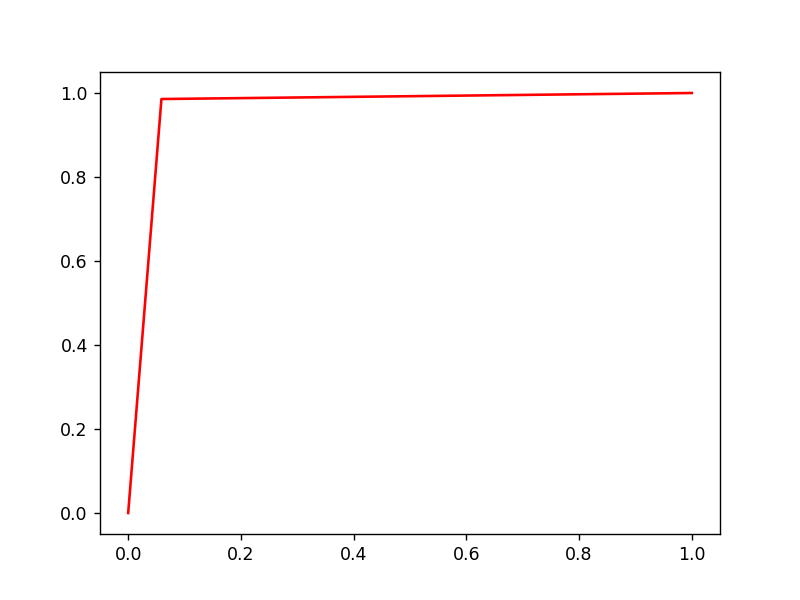

In [59]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
from sklearn.metrics import precision_recall_curve,roc_curve
import matplotlib.pyplot as plt
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))
% matplotlib notebook
fpr,tpr,_=roc_curve(y_test,predictions)
plt.plot(fpr,tpr,'r')
plt.show()

In [60]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['no good' 'junk' 'not good' 'horrible' 'worst' 'poor' 'terrible' 'garbage'
 'nope' 'ok not']

Largest Coefs: 
['excelente' 'not bad' 'excelent' 'excellent' 'no problems' 'perfect'
 'awesome' 'amazing' 'exelente' 'no issues']


In [61]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]
